<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/pytorch_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

**Hyperparameters**

In [3]:
input_size =1
output_size =1
n_epochs =5
learning_rate =0.005

**Sample Dataset**

In [4]:
X_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]],dtype=np.float32)

Y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]],dtype=np.float32)


In [6]:
# linear Regression Model
model =nn.Linear(input_size ,output_size)
model

Linear(in_features=1, out_features=1, bias=True)

In [7]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.005
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

**Train Model**

In [8]:
for epoch in range(n_epochs):
  # convert numpy array to torch tensor
  inputs = torch.from_numpy(X_train)
  targets = torch.from_numpy(Y_train)

  # Forward Pass
  outputs =model(inputs)
  loss = criterion(outputs ,targets)

  # Backward and Optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 5==0:
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1 ,n_epochs ,loss.item()))


Epoch [5/5], Loss: 0.3503


**plot graph**

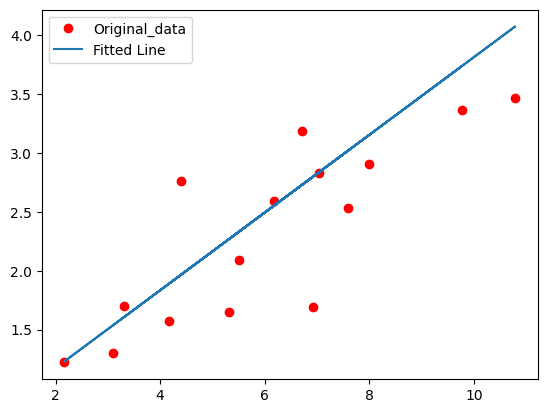

In [10]:
predicted =model(torch.from_numpy(X_train)).detach().numpy()
plt.plot(X_train ,Y_train ,'ro',label='Original_data')
plt.plot(X_train ,predicted ,label="Fitted Line")
plt.legend()
plt.show()

**Saving model**

In [12]:
torch.save(model.state_dict(),'torch_with_LinearRegression.csv')